<a href="https://colab.research.google.com/github/Saumyen10/PyTorch_Demo/blob/main/Neural_Network_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Binary Classification Practise:**

In [ ]:
##1. Create the toy dataset

In [ ]:
#dependencies
import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
#create moons
X, Y = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
X.shape, Y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(Y)

(1000, 1000)

In [ ]:
print(f'First 5 samples of X:', X[:5])

First 5 samples of X: [[-0.11166654  0.52022374]
 [ 1.14264982 -0.34257734]
 [ 0.79555796 -0.01144231]
 [ 0.11182668 -0.55193153]
 [-0.81646618  0.54399604]]


In [ ]:
print(f'First 5 samples of Y:', Y[:5])

First 5 samples of Y: [1 1 1 1 0]


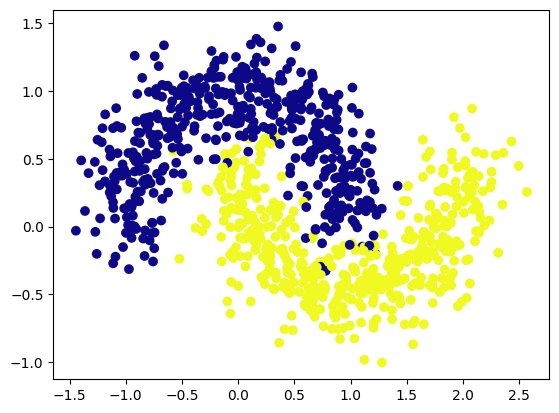

In [ ]:
#Visualising the data

import matplotlib.pyplot as plt

#plot the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.plasma)

In [ ]:
##2. convert Data into Tensors

In [ ]:
X.dtype, Y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
# turning data into tensors

X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [ ]:
X.dtype, Y.dtype

(torch.float32, torch.float32)

In [ ]:
#create train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(800, 200, 800, 200)

In [ ]:
X_train.shape, Y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
X_test.shape, Y_test.shape

(torch.Size([200, 2]), torch.Size([200]))

In [ ]:
##3. Build the model (Binary-class)

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn


In [ ]:
#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#step 1: construct a model that subclass nn.Module but use a non-linear Activation function

class CircleModel0(nn.Module):
  def __init__(self):
    super().__init__()

    #step 2: create 2 nn.Linear Layers
    self.layer1 = nn.Linear(in_features=2,out_features=8)
    self.layer2 = nn.Linear(in_features=8,out_features=8)
    self.layer3 = nn.Linear(in_features=8,out_features=8)
    self.layer4 = nn.Linear(in_features=8,out_features=1)

    #Non-linear activation function
    self.relu = nn.ReLU()

  #step 3: Forward method to outline Forward pass
  def forward(self,x):
    return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))

#step 4: Instantiate an instance of the model class
model_0 = CircleModel0().to(device)  #sending it to target device

In [ ]:
model_0

CircleModel0(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=8, bias=True)
  (layer4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
##4. Create loss function/optimiser

In [ ]:
#BCELogits Loss fn
loss_fn = nn.BCEWithLogitsLoss()

In [ ]:
#Adam optimizer
optimizer = torch.optim.Adam (params=model_0.parameters(),
                            lr=0.01)

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('layer1.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('layer2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.

In [ ]:
#Evaluation of model

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
##5. Training the model

In [ ]:
#Random seed

torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
#Put data to target device (Device Agnostic Code)
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

In [ ]:
#Loop through data
epochs = 100

for epoch in range(epochs):

 ###Training
  model_0.train()

  #step 1: Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  #converting logits -> prediction probablities -> prediction labels

  #step 2: Calculae loss, accuraccy
  train_loss = loss_fn(y_logits, Y_train)
  train_acc = accuracy_fn(y_true = Y_train, y_pred = y_pred)

  if epoch % 10 == 0:
    print(f'Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%' )

  #step 3: Zero graident
  optimizer.zero_grad()

  #step 4: Perform backpropagation on the loss
  train_loss.backward()

  #step 5: Update the optimizer (gradient descent)
  optimizer.step()

  ###Testing

  model_0.eval()            #turns off different settings in the model that is not required during Training
  with torch.inference_mode():      # turns off gradient

    #step 1: Forward Pass
    test_logits = model_0(X_test).squeeze()   #squeeze to remove one dimension
    test_pred = torch.round(torch.sigmoid(test_logits))

    #step 2: Calculate the test loss/ acc
    test_loss = loss_fn(test_logits, Y_test)
    test_acc = accuracy_fn(y_true = Y_test, y_pred = test_pred)

    if epoch % 10 == 0:
      print(f'Epoch: {epoch} |  Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%' )

Train Loss: 0.70243 | Train Accuracy: 50.00%
Epoch: 0 |  Test Loss: 0.69778 | Test Accuracy: 50.00%
Train Loss: 0.66110 | Train Accuracy: 72.25%
Epoch: 10 |  Test Loss: 0.65993 | Test Accuracy: 67.50%
Train Loss: 0.56537 | Train Accuracy: 77.88%
Epoch: 20 |  Test Loss: 0.57060 | Test Accuracy: 73.00%
Train Loss: 0.43392 | Train Accuracy: 81.38%
Epoch: 30 |  Test Loss: 0.44176 | Test Accuracy: 78.50%
Train Loss: 0.33521 | Train Accuracy: 84.75%
Epoch: 40 |  Test Loss: 0.33579 | Test Accuracy: 82.00%
Train Loss: 0.28543 | Train Accuracy: 87.50%
Epoch: 50 |  Test Loss: 0.27529 | Test Accuracy: 87.50%
Train Loss: 0.26711 | Train Accuracy: 87.88%
Epoch: 60 |  Test Loss: 0.24999 | Test Accuracy: 88.00%
Train Loss: 0.24528 | Train Accuracy: 89.62%
Epoch: 70 |  Test Loss: 0.23041 | Test Accuracy: 89.50%
Train Loss: 0.20970 | Train Accuracy: 91.50%
Epoch: 80 |  Test Loss: 0.18867 | Test Accuracy: 91.50%
Train Loss: 0.15468 | Train Accuracy: 95.25%
Epoch: 90 |  Test Loss: 0.12475 | Test Accuracy

In [ ]:
##6. Evaluating the model

In [ ]:
#make predictions

model_0.eval()            #turns off different settings in the model that is not required during Training
with torch.inference_mode():

  y_preds = model_0(X_test).squeeze()   #squeeze to remove one dimension

In [ ]:
y_preds[:5]

tensor([ 3.2086, -5.1008,  6.5750, -6.6746,  8.7141])

In [ ]:
Y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
import requests
from pathlib import Path

# Download this helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

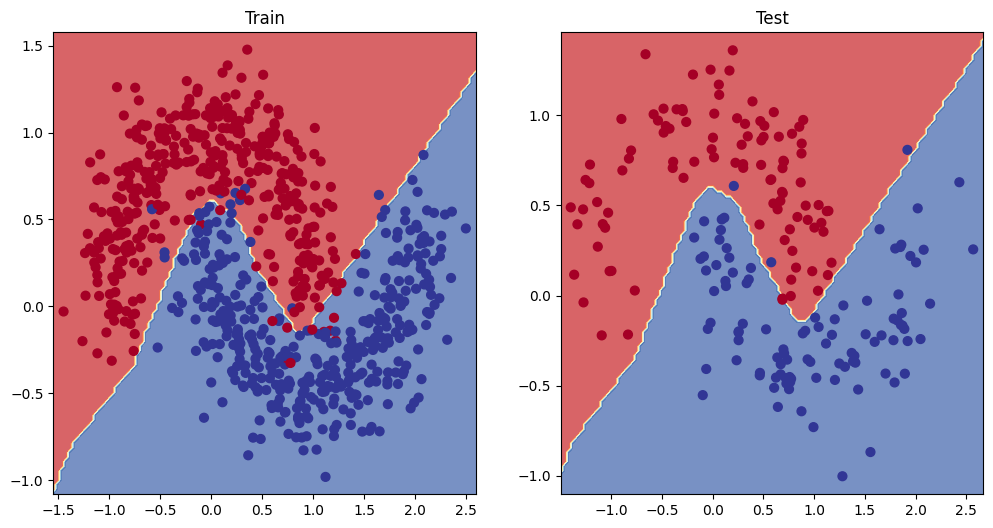

In [ ]:
#Plot decision boundaries

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, Y_test)

**model_0 (Binary Classification**) has -

Training accuracy: **95.25%**

Testing accuracy: **96.5%**

### **Multiclass Classification Practise:**

In [ ]:
##1. Create the Spirals dataset from cs231n

In [ ]:
#dependencies

import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#hyperparamters

N = 100   # number of points per class
D = 2     # dimensionality
K = 3     # number of classes

In [ ]:
X = np.zeros((N*K,D))               # data matrix (each row = single example)
Y = np.zeros(N*K, dtype='uint8')    # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  Y[ix] = j

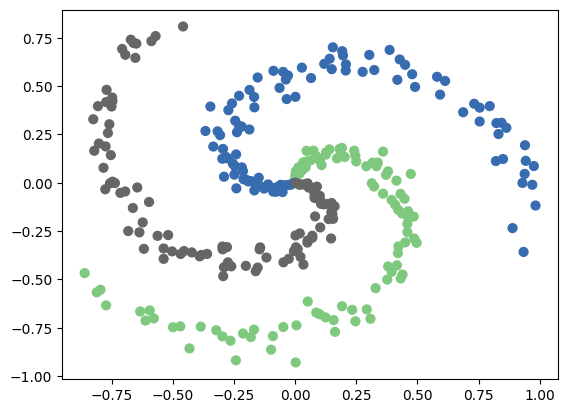

In [ ]:
#visualize the data
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Accent)
plt.show()

In [ ]:
X.shape, Y.shape

((300, 2), (300,))

In [ ]:
len(X), len(Y)

(300, 300)

In [ ]:
print(f'First 5 samples of X:', X[:5])

First 5 samples of X: [[0.         0.        ]
 [0.00153296 0.00998401]
 [0.00030715 0.02019969]
 [0.002002   0.03023683]
 [0.00057234 0.04039999]]


In [ ]:
print(f'First 5 samples of Y:', Y[:5])

First 5 samples of Y: [0 0 0 0 0]


In [ ]:
##2. Create data into tensors

In [ ]:
X.dtype, Y.dtype

(dtype('float64'), dtype('uint8'))

In [ ]:
# turning data into tensors

X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.LongTensor)

In [ ]:
X.dtype, Y.dtype

(torch.float32, torch.int64)

In [ ]:
#create train/test split

from sklearn.model_selection import train_test_split

X_train_split, X_test_split, Y_train_split, Y_test_split = train_test_split (X, Y, test_size=0.2, random_state=42)

In [ ]:
len(X_train_split), len(X_test_split), len(Y_train_split), len(Y_test_split)

(240, 60, 240, 60)

In [ ]:
###3. Build the model

In [ ]:
#Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#Build model

class SpiralModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):      #since it is a multi-class model,
    super().__init__()

    #layers
    self.layerStack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  #forward pass
  def forward(self, x):
    return self.layerStack(x)

#Create an instance of the model
model_1 = SpiralModel(input_features=2,
                      output_features=4,
                      hidden_units=16).to(device)

In [ ]:
model_1

SpiralModel(
  (layerStack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=4, bias=True)
  )
)

In [ ]:
model_1.state_dict()

OrderedDict([('layerStack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]])),
             ('layerStack.0.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265])),
             ('layerStack.2.weight',
              tensor([[ 0

In [ ]:
##4. Create loss function/Optimiser

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.01)

In [ ]:
###5. Making predictions with the model (Not necessary)

In [ ]:
#making some predictions and create logits

model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test_split)

In [ ]:
y_logits[:10]

tensor([[-0.0911, -0.2097, -0.1204,  0.1503],
        [-0.0877, -0.2034, -0.1038,  0.1373],
        [-0.0951, -0.2064, -0.1226,  0.1281],
        [-0.0918, -0.2100, -0.1230,  0.1490],
        [-0.0843, -0.2054, -0.1154,  0.1539],
        [-0.0857, -0.2059, -0.1169,  0.1537],
        [-0.0912, -0.1911, -0.2394,  0.1642],
        [-0.0911, -0.2093, -0.1175,  0.1466],
        [-0.0920, -0.2102, -0.1213,  0.1485],
        [-0.0957, -0.2037, -0.1795,  0.1553]])

In [ ]:
#convert Logits-> Pred Probs

y_pred_probs = torch.softmax(y_logits, dim=1)

In [ ]:
y_pred_probs[:10]

tensor([[0.2420, 0.2149, 0.2350, 0.3081],
        [0.2423, 0.2158, 0.2384, 0.3034],
        [0.2429, 0.2173, 0.2363, 0.3036],
        [0.2421, 0.2151, 0.2347, 0.3080],
        [0.2425, 0.2148, 0.2350, 0.3077],
        [0.2423, 0.2149, 0.2349, 0.3079],
        [0.2464, 0.2230, 0.2125, 0.3181],
        [0.2421, 0.2151, 0.2358, 0.3070],
        [0.2420, 0.2151, 0.2351, 0.3079],
        [0.2437, 0.2188, 0.2241, 0.3133]])

In [ ]:
#convert Pred Probs -> Pred Labels

y_preds = torch.argmax(y_pred_probs, dim=1)

In [ ]:
y_preds[:10]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
Y_test_split[:10]

tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1])

In [ ]:
##6. Training the model

In [ ]:
#random seed

torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
#Device agnostic code

X_train_split, Y_train_split = X_train_split.to(device), Y_train_split.to(device)
X_test_split, Y_test_split = X_test_split.to(device), Y_test_split.to(device)

In [ ]:
#epochs

epochs = 100

In [ ]:
### training

#Loop through data

for epoch in range(epochs):

 ###Training
  model_1.train()

  #step 1: Forward Pass
  y_logits = model_1(X_train_split)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)  #converting logits -> prediction probablities -> prediction labels

  #step 2: Calculae loss, accuraccy
  train_loss = loss_fn(y_logits, Y_train_split)
  train_acc = accuracy_fn(y_true = Y_train_split, y_pred = y_pred)

  if epoch % 10 == 0:
    print(f'Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%' )

  #step 3: Zero graident
  optimizer.zero_grad()

  #step 4: Perform backpropagation on the loss
  train_loss.backward()

  #step 5: Update the optimizer (gradient descent)
  optimizer.step()

  ###Testing

  model_1.eval()            #turns off different settings in the model that is not required during Training
  with torch.inference_mode():      # turns off gradient

    #step 1: Forward Pass
    test_logits = model_1(X_test_split)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

    #step 2: Calculate the test loss/ acc
    test_loss = loss_fn(test_logits, Y_test_split)
    test_acc = accuracy_fn(y_true = Y_test_split, y_pred = test_pred)

    if epoch % 10 == 0:
      print(f'Epoch: {epoch} |  Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%' )

Train Loss: 1.46254 | Train Accuracy: 0.00%
Epoch: 0 |  Test Loss: 1.42878 | Test Accuracy: 0.00%
Train Loss: 1.13247 | Train Accuracy: 54.17%
Epoch: 10 |  Test Loss: 1.13578 | Test Accuracy: 40.00%
Train Loss: 0.86001 | Train Accuracy: 57.08%
Epoch: 20 |  Test Loss: 0.85631 | Test Accuracy: 60.00%
Train Loss: 0.68090 | Train Accuracy: 58.33%
Epoch: 30 |  Test Loss: 0.71031 | Test Accuracy: 53.33%
Train Loss: 0.57456 | Train Accuracy: 66.25%
Epoch: 40 |  Test Loss: 0.64217 | Test Accuracy: 56.67%
Train Loss: 0.44675 | Train Accuracy: 76.67%
Epoch: 50 |  Test Loss: 0.49874 | Test Accuracy: 70.00%
Train Loss: 0.31746 | Train Accuracy: 87.08%
Epoch: 60 |  Test Loss: 0.34288 | Test Accuracy: 88.33%
Train Loss: 0.20105 | Train Accuracy: 94.58%
Epoch: 70 |  Test Loss: 0.21168 | Test Accuracy: 98.33%
Train Loss: 0.12731 | Train Accuracy: 96.67%
Epoch: 80 |  Test Loss: 0.12129 | Test Accuracy: 98.33%
Train Loss: 0.08839 | Train Accuracy: 99.17%
Epoch: 90 |  Test Loss: 0.07358 | Test Accuracy: 

In [ ]:
###7. Evaluate model (by making predictions)

In [ ]:
#make predictions, create logits

model_1.eval()            #turns off different settings in the model that is not required during Training
with torch.inference_mode():

  y_logits = model_1(X_test_split)

In [ ]:
y_logits[:10]

tensor([[  5.7893,   4.0794,   6.4483, -12.0680],
        [  4.9965,  -0.2965,   8.2874,  -9.8035],
        [  2.8337,   9.8017,   6.3845, -13.7783],
        [  7.2788,   4.5578,   5.0456, -12.3277],
        [  5.1978,  -0.8180,   9.5805, -10.6292],
        [  4.0830,   0.3166,   9.8797, -10.9151],
        [ -1.8389,  12.7878,  -4.6301, -15.1113],
        [  4.0592,   8.1301,   5.1478, -12.7321],
        [  6.5112,   5.2217,   5.1893, -12.3847],
        [  7.8733,  20.6779, -16.0194, -16.3392]])

In [ ]:
#convert Logits-> Pred Probs

y_pred_probs = torch.softmax(y_logits, dim=1)

In [ ]:
y_pred_probs[:10]

tensor([[3.2115e-01, 5.8091e-02, 6.2076e-01, 5.6416e-09],
        [3.5876e-02, 1.8033e-04, 9.6394e-01, 1.3405e-08],
        [9.1077e-04, 9.6735e-01, 3.1735e-02, 5.5579e-11],
        [8.5252e-01, 5.6104e-02, 9.1380e-02, 2.6046e-09],
        [1.2337e-02, 3.0101e-05, 9.8763e-01, 1.6505e-09],
        [3.0282e-03, 7.0058e-05, 9.9690e-01, 9.2810e-10],
        [4.4432e-07, 1.0000e+00, 2.7258e-08, 7.6485e-13],
        [1.5980e-02, 9.3656e-01, 4.7465e-02, 8.1508e-10],
        [6.4849e-01, 1.7860e-01, 1.7291e-01, 4.0317e-09],
        [2.7481e-06, 1.0000e+00, 1.1549e-16, 8.3879e-17]])

In [ ]:
#convert Pred Probs -> Pred Labels

y_preds = torch.argmax(y_pred_probs, dim=1)

In [ ]:
y_preds[:10]

tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1])

In [ ]:
Y_test_split[:10]

tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1])

In [ ]:
###8. Visualise the model

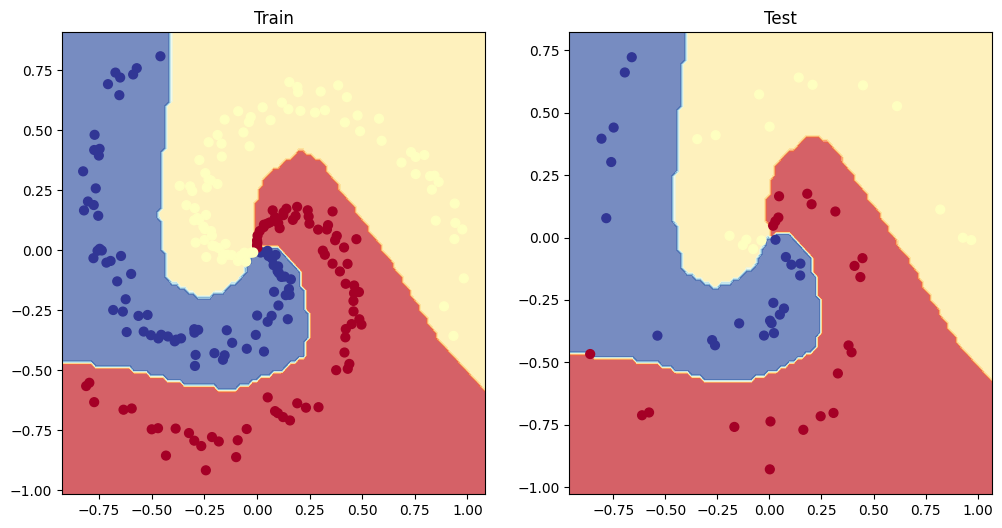

In [ ]:
#Plot decision boundaries

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train_split, Y_train_split)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test_split, Y_test_split)

**model_1 (Multi-class Classification**) has -

Training accuracy: **99.17%**

Testing accuracy: **98.3**